<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.2'

In [ ]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n20.csv')

In [ ]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.685529,47.683874,-0.001307,117.368096,117.370518,-0.002423
1,0.0,1.0,78.804208,72.645879,-0.001129,161.448958,161.448856,0.000102
2,0.0,2.0,93.112056,40.245351,-0.001343,143.356064,143.356486,-0.000422
3,0.0,3.0,50.152409,75.878592,0.001398,136.032399,136.031642,0.000756
4,0.0,4.0,72.712769,79.853687,-0.000898,162.565557,162.565359,0.000198
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.768272,68.161767,-0.002049,121.927990,121.929731,-0.001741
19996,999.0,16.0,27.624057,93.651205,-0.000039,131.275223,131.274573,0.000650
19997,999.0,17.0,85.715536,87.953722,-0.001336,183.667921,183.669247,-0.001326
19998,999.0,18.0,76.302910,58.569058,-0.000088,144.871881,144.872093,-0.000212


In [ ]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    59.685529  47.683874 -0.001307  117.368096  117.370518 -0.002423
      1.0    78.804208  72.645879 -0.001129  161.448958  161.448856  0.000102
      2.0    93.112056  40.245351 -0.001343  143.356064  143.356486 -0.000422
      3.0    50.152409  75.878592  0.001398  136.032399  136.031642  0.000756
      4.0    72.712769  79.853687 -0.000898  162.565557  162.565359  0.000198
...                ...        ...       ...         ...         ...       ...
999.0 15.0   43.768272  68.161767 -0.002049  121.927990  121.929731 -0.001741
      16.0   27.624057  93.651205 -0.000039  131.275223  131.274573  0.000650
      17.0   85.715536  87.953722 -0.001336  183.667921  183.669247 -0.001326
      18.0   76.302910  58.569058 -0.000088  144.871881  144.872093 -0.000212
      19.0   57.483367  81.086128  0.001282  148.570777  148.569233  0.001544

[20000 rows x 6 columns]

In [ ]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    59.685529  47.683874 -0.001307  117.368096  117.370518 -0.002423
      1.0    78.804208  72.645879 -0.001129  161.448958  161.448856  0.000102
      2.0    93.112056  40.245351 -0.001343  143.356064  143.356486 -0.000422
      3.0    50.152409  75.878592  0.001398  136.032399  136.031642  0.000756
      4.0    72.712769  79.853687 -0.000898  162.565557  162.565359  0.000198
...                ...        ...       ...         ...         ...       ...
999.0 15.0   43.768272  68.161767 -0.002049  121.927990  121.929731 -0.001741
      16.0   27.624057  93.651205 -0.000039  131.275223  131.274573  0.000650
      17.0   85.715536  87.953722 -0.001336  183.667921  183.669247 -0.001326
      18.0   76.302910  58.569058 -0.000088  144.871881  144.872093 -0.000212
      19.0   57.483367  81.086128  0.001282  148.570777  148.569233  0.001544

[20000 rows x 6 columns]

In [ ]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.685529,47.683874,-0.001307,117.368096,117.370518,-0.002423
1,0.0,1.0,78.804208,72.645879,-0.001129,161.448958,161.448856,0.000102
2,0.0,2.0,93.112056,40.245351,-0.001343,143.356064,143.356486,-0.000422
3,0.0,3.0,50.152409,75.878592,0.001398,136.032399,136.031642,0.000756
4,0.0,4.0,72.712769,79.853687,-0.000898,162.565557,162.565359,0.000198
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.768272,68.161767,-0.002049,121.927990,121.929731,-0.001741
19996,999.0,16.0,27.624057,93.651205,-0.000039,131.275223,131.274573,0.000650
19997,999.0,17.0,85.715536,87.953722,-0.001336,183.667921,183.669247,-0.001326
19998,999.0,18.0,76.302910,58.569058,-0.000088,144.871881,144.872093,-0.000212


In [ ]:
table.set_index(['rep', 'index'], inplace=True)

In [ ]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    59.685529  47.683874 -0.001307  117.368096  117.370518 -0.002423
      1.0    78.804208  72.645879 -0.001129  161.448958  161.448856  0.000102
      2.0    93.112056  40.245351 -0.001343  143.356064  143.356486 -0.000422
      3.0    50.152409  75.878592  0.001398  136.032399  136.031642  0.000756
      4.0    72.712769  79.853687 -0.000898  162.565557  162.565359  0.000198
...                ...        ...       ...         ...         ...       ...
999.0 15.0   43.768272  68.161767 -0.002049  121.927990  121.929731 -0.001741
      16.0   27.624057  93.651205 -0.000039  131.275223  131.274573  0.000650
      17.0   85.715536  87.953722 -0.001336  183.667921  183.669247 -0.001326
      18.0   76.302910  58.569058 -0.000088  144.871881  144.872093 -0.000212
      19.0   57.483367  81.086128  0.001282  148.570777  148.569233  0.001544

[20000 rows x 6 columns]

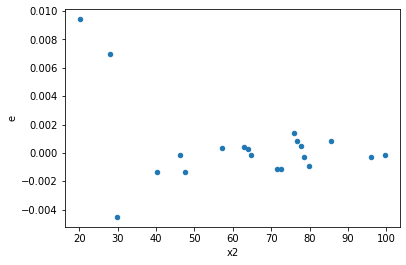

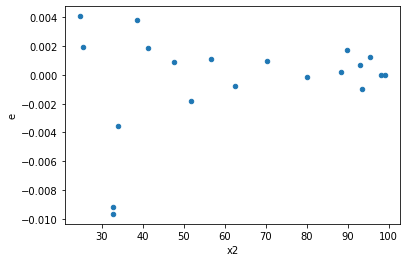

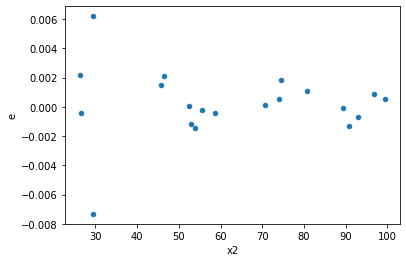

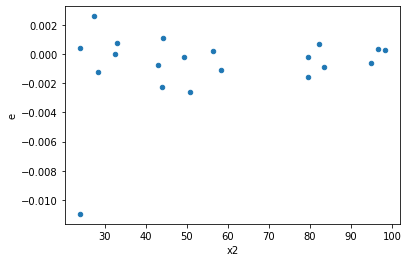

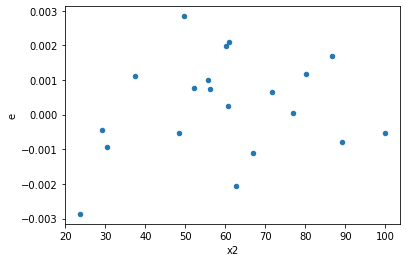

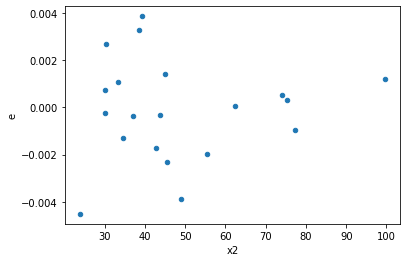

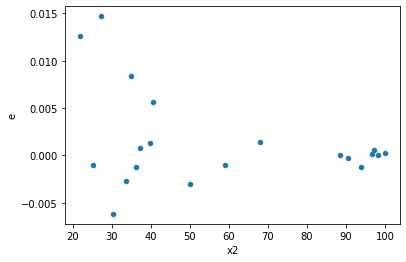

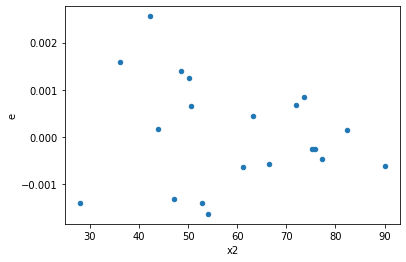

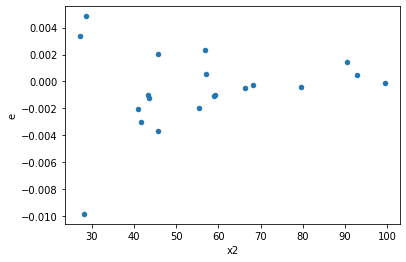

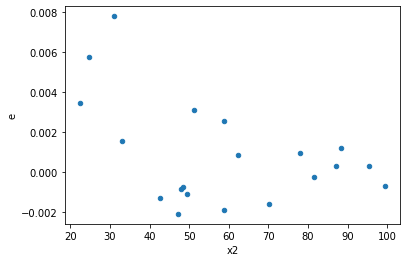

In [ ]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [ ]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,9.0,7.0,1.2405724882216412e-05,0.00020238527774589033,1.3784138758018235e-06,2.891218253512719e-05,20.97496480751035,0.0005835495553341286,0.9997082252223329,0.0002917747776670643,Reject001=0 : Heteroscedasticity
8.0,9.0,7.0,4.4531058808781586e-05,7.655591646693723e-05,4.947895423197954e-06,1.0936559495276747e-05,2.2103457247704243,0.30826321154345937,0.8458683942282703,0.15413160577172969,Reject001=1 : Homoscedasticity
13.0,8.0,8.0,8.296563772867147e-06,5.2726202202802526e-05,1.0370704716083934e-06,6.590775275350316e-06,6.355185549858224,0.0169633805156435,0.9915183097421782,0.00848169025782175,Reject001=1 : Homoscedasticity
20.0,8.0,8.0,5.9558234754588135e-06,1.009550520332687e-05,7.444779344323517e-07,1.2619381504158587e-06,1.6950645439586591,0.4718885088009581,0.7640557455995209,0.23594425440047906,Reject001=1 : Homoscedasticity
22.0,6.0,10.0,9.159496658044056e-07,9.710606459807814e-05,1.526582776340676e-07,9.710606459807813e-06,63.61008790551669,4.3654174897156395e-07,0.9999997817291255,2.1827087448578197e-07,Reject001=0 : Heteroscedasticity
23.0,10.0,6.0,1.1540198060336337e-05,0.00020156560749298174,1.1540198060336337e-06,3.3594267915496954e-05,29.110651082289877,0.000542430033882324,0.9997287849830588,0.000271215016941162,Reject001=0 : Heteroscedasticity
28.0,8.0,8.0,1.653228511016293e-05,3.6749340219102345e-05,2.0665356387703662e-06,4.593667527387793e-06,2.2228832840846264,0.2795114898061415,0.8602442550969293,0.13975574490307074,Reject001=1 : Homoscedasticity
29.0,10.0,6.0,1.5223732554843688e-05,5.455806158058162e-05,1.5223732554843687e-06,9.09301026343027e-06,5.972917765516825,0.040181466711185276,0.9799092666444074,0.020090733355592638,Reject001=1 : Homoscedasticity
31.0,11.0,5.0,1.0223725997986887e-05,0.00010111059591328595,9.29429636180626e-07,2.022211918265719e-05,21.75755796399762,0.0032492745843983872,0.9983753627078008,0.0016246372921991936,Reject001=0 : Heteroscedasticity


In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,9.0,2.786276764574578e-05,6.744100730548802e-06,3.980395377963683e-06,7.493445256165336e-07,0.18825881714290613,0.038572709182290124,Reject001=1 : Homoscedasticity
1.0,9.0,7.0,1.2405724882216412e-05,0.00020238527774589033,1.3784138758018235e-06,2.891218253512719e-05,20.97496480751035,0.0005835495553341286,Reject001=0 : Heteroscedasticity
2.0,9.0,7.0,9.779738694379076e-05,6.297740195082655e-06,1.0866376327087862e-05,8.996771707260936e-07,0.08279458981034599,0.0012551059824339973,Reject001=0 : Heteroscedasticity
3.0,10.0,6.0,9.64927029265931e-05,3.139221767868999e-06,9.64927029265931e-06,5.232036279781665e-07,0.05422209266706873,0.00014236718407545148,Reject001=0 : Heteroscedasticity
4.0,6.0,10.0,1.136835112955349e-05,1.6132845136865974e-05,1.894725188258915e-06,1.6132845136865974e-06,0.8514609525875693,0.8808281967101975,Reject001=1 : Homoscedasticity
5.0,6.0,10.0,3.127358231081032e-05,3.2311759807845414e-05,5.212263718468386e-06,3.2311759807845416e-06,0.6199179771613736,0.5771102748490134,Reject001=1 : Homoscedasticity
6.0,11.0,5.0,0.00029682840463758365,1.7538043883968244e-06,2.6984400421598515e-05,3.507608776793649e-07,0.012998653748060056,7.039079162738844e-08,Reject001=0 : Heteroscedasticity
7.0,6.0,10.0,8.733852656634418e-06,1.0148680013458786e-05,1.4556421094390697e-06,1.0148680013458786e-06,0.6971960997589971,0.6829544703813354,Reject001=1 : Homoscedasticity
8.0,9.0,7.0,4.4531058808781586e-05,7.655591646693723e-05,4.947895423197954e-06,1.0936559495276747e-05,2.2103457247704243,0.30826321154345937,Reject001=1 : Homoscedasticity


In [ ]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      555
Reject001=0 : Heteroscedasticity    445
Name: Result_test, dtype: int64